In [1]:
#Importamos las librerias principales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

In [2]:
#Cargamos el dataset y dividimos entre train y test
full_df = pd.read_csv('./airbnb-listings-extract.csv', sep=';', decimal='.')
from sklearn.model_selection import train_test_split
train, test = train_test_split(full_df, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos el train y el test en respectivos csv y despues 
#cargamos el train en un nuevo dataframe que es el que manipularemos
train.to_csv('./train.csv', sep=';', decimal='.', index=False)
test.to_csv('./test.csv', sep=';', decimal='.', index=False)
df_train = pd.read_csv('./train.csv', sep=';', decimal='.')

Dimensiones del dataset de training: (11824, 89)
Dimensiones del dataset de test: (2956, 89)


In [3]:
df_train.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,5994463,https://www.airbnb.com/rooms/5994463,20170407214119,2017-04-08,PISO ATOCHA- FLAT NEAR ATOCHA .,Piso recién reformado cómoda habitación con ba...,"Un piso muy cómodo en Jerónimos, una de las zo...",Piso recién reformado cómoda habitación con ba...,none,El barrio de Jeronimos es un enclave tranquilo...,...,10.0,10.0,9.0,NaN,NaN,moderate,2.0,0.50,"40.4077318793,-3.68481869733","Host Has Profile Pic,Is Location Exact,Require..."
1,14136180,https://www.airbnb.com/rooms/14136180,20170407214119,2017-04-08,The Palace Sol Madrid.,"Lugares de interés: Plaza Mayor, Plaza del Sol...",El apartamento dispone de un dormitorio indepe...,"Lugares de interés: Plaza Mayor, Plaza del Sol...",none,"Situado en el corazón de Madrid, este apartame...",...,10.0,10.0,10.0,NaN,NaN,flexible,1.0,2.43,"40.4158022422,-3.70534037765","Host Has Profile Pic,Host Identity Verified,Re..."
2,15520134,https://www.airbnb.com/rooms/15520134,20170407214119,2017-04-08,por persona la noche metro linea5 vista alegre,"我的房源靠近餐厅和餐饮、适合家庭的活动、公共交通。因为舒适的床、温馨、厨房、景观,您一定会爱...",NaN,"我的房源靠近餐厅和餐饮、适合家庭的活动、公共交通。因为舒适的床、温馨、厨房、景观,您一定会爱...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,moderate,16.0,NaN,"40.3890481626,-3.74037392557","Host Has Profile Pic,Host Identity Verified,Is..."
3,8809721,https://www.airbnb.com/rooms/8809721,20170407214119,2017-04-08,CITY CENTER JACINTO BENAVENTE ROOM4,This stunning and amazig room is covered with ...,NaN,This stunning and amazig room is covered with ...,none,NaN,...,NaN,NaN,NaN,NaN,NaN,strict,97.0,NaN,"40.4128140929,-3.70305247638","Host Has Profile Pic,Requires License"
4,1162707,https://www.airbnb.com/rooms/1162707,20170407214119,2017-04-08,NICE & BIG DOUBLE ROOM AT DOWNTOWN,NaN,We are a young couple; David (Spain) and Ana (...,We are a young couple; David (Spain) and Ana (...,none,NaN,...,10.0,9.0,9.0,NaN,NaN,strict,2.0,2.08,"40.4386311984,-3.71371613279","Host Has Profile Pic,Host Identity Verified,Is..."


In [4]:
#Como primer paso, vamos a eliminar del dataframe todas aquellas caracteristicas que corresponden a un texto
#Para ello vamos a eliminar todas las columnas que tengan alguna entrada mayor a 25 caracteres
delete_columns = df_train.select_dtypes(['object']).applymap(lambda x: len(str(x)) > 25).any(axis=0)
delete = delete_columns[delete_columns[:]==True]
delete = delete.axes[0].tolist()

print(f"En valor absoluto hemos quitado {len(delete)} columnas de {df_train.shape[1]}")
print(f"En valor relativo hemos quitado un {round((len(delete))*100/df_train.shape[1],2)} % de las columnas")

df_train = df_train.drop(columns=delete)

En valor absoluto hemos quitado 34 columnas de 89
En valor relativo hemos quitado un 38.2 % de las columnas


In [5]:
# A continuacion vamos a quitar todas aquellas columnas que tengan un numero de NA superior al 50% de las filas
#Vamos a librarnos de todas aquellas columnas que tienen mas de un 50% de filas con valores nulos
n_nulos = round(0.5*df_train.shape[0])
size_train = df_train.shape[1]
df_train= df_train.dropna(axis=1, thresh=n_nulos)
print(f"En valor absoluto hemos quitado {size_train-df_train.shape[1]} columnas de {size_train} quedando así {df_train.shape[1]} columnas")
print(f"En valor relativo hemos quitado un {round((size_train-df_train.shape[1])*100/size_train,2)} % de las columnas")


En valor absoluto hemos quitado 6 columnas de 55 quedando así 49 columnas
En valor relativo hemos quitado un 10.91 % de las columnas


In [6]:
df_train.columns

Index(['ID', 'Scrape ID', 'Last Scraped', 'Experiences Offered', 'Host ID',
       'Host Since', 'Host Response Time', 'Host Response Rate',
       'Host Listings Count', 'Host Total Listings Count',
       'Neighbourhood Group Cleansed', 'Zipcode', 'Market', 'Country Code',
       'Country', 'Latitude', 'Longitude', 'Property Type', 'Room Type',
       'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Price',
       'Cleaning Fee', 'Guests Included', 'Extra People', 'Minimum Nights',
       'Maximum Nights', 'Calendar Updated', 'Availability 30',
       'Availability 60', 'Availability 90', 'Availability 365',
       'Calendar last Scraped', 'Number of Reviews', 'First Review',
       'Last Review', 'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'Cancellation Policy',
       'Calculated host listings count', 'Reviews 

In [7]:
#Ahora vamos a deshacernos de algunas columnas que a simple vista no son relevantes (ID, Scrape ID, Host ID...)
borrar_columnas = ["ID","Scrape ID", "Host ID","Latitude","Longitude"]
size_train = df_train.shape[1]
df_train= df_train.drop(columns=borrar_columnas)
print(f"En valor absoluto hemos quitado {size_train-df_train.shape[1]} columnas de {size_train} quedando así {df_train.shape[1]} columnas")
print(f"En valor relativo hemos quitado un {round((size_train-df_train.shape[1])*100/size_train,2)} % de las columnas")


En valor absoluto hemos quitado 5 columnas de 49 quedando así 44 columnas
En valor relativo hemos quitado un 10.2 % de las columnas


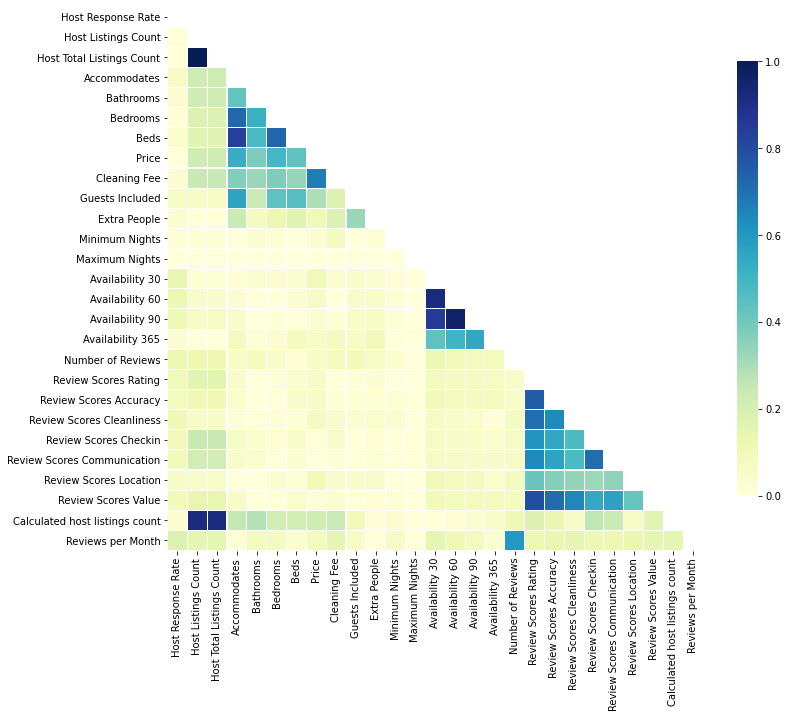

In [8]:
#Ahora vamos a echar un vistazo a la matriz de correlacion para deshacernos de variables con alta dependencia lineal

import seaborn as sns

# Compute the correlation matrix
corr = np.abs(df_train.corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

In [9]:
#Vamos a considerar alta dependencia lineal a aquellas caracteristica que tengan un valor mayor a 0.85
corr>0.85

,Host Response Rate,Host Listings Count,Host Total Listings Count,Accommodates,Bathrooms,Bedrooms,Beds,Price,Cleaning Fee,Guests Included,...,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
Host Response Rate,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Host Listings Count,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
Host Total Listings Count,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
Accommodates,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Bathrooms,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Bedrooms,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Beds,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Price,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
Cleaning Fee,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
Guests Included,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


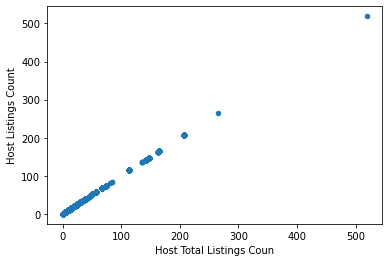

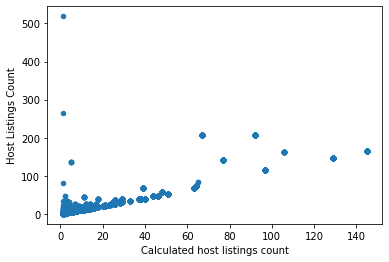

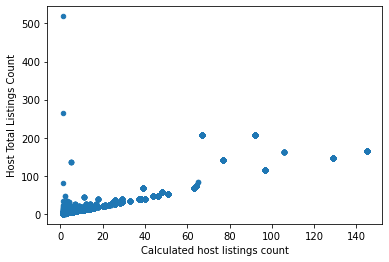

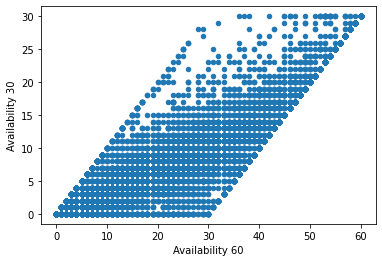

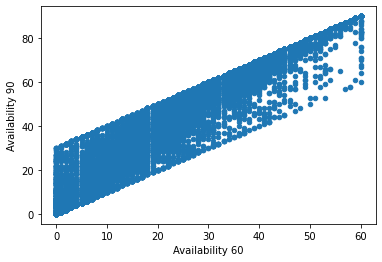

In [10]:
#Vamos a analizar las caracteristicas con alta dependencia lineal antes de eliminarlos por si
#hubiese algun motivo por el que no eliminarlos
df_train.plot(kind = 'scatter',x='Host Total Listings Count',y = 'Host Listings Count')
plt.xlabel('Host Total Listings Coun')
plt.ylabel('Host Listings Count')
plt.show()

df_train.plot(kind = 'scatter',x='Calculated host listings count',y = 'Host Listings Count')
plt.xlabel('Calculated host listings count')
plt.ylabel('Host Listings Count')
plt.show()

df_train.plot(kind = 'scatter',x='Calculated host listings count',y = 'Host Total Listings Count')
plt.xlabel('Calculated host listings count')
plt.ylabel('Host Total Listings Count')
plt.show()

df_train.plot(kind = 'scatter',x='Availability 60',y = 'Availability 30')
plt.xlabel('Availability 60')
plt.ylabel('Availability 30')
plt.show()

df_train.plot(kind = 'scatter',x='Availability 60',y = 'Availability 90')
plt.xlabel('Availability 60')
plt.ylabel('Availability 90')
plt.show()

In [11]:
# Nos desacemos de todas aquellas variables que tienen una altacorrelacion entre si y nos quedamos solo con una de cada
size_train = df_train.shape[1]
df_train = df_train.drop(columns=["Availability 60", "Availability 90", "Calculated host listings count","Host Total Listings Count"])
print(f"En valor absoluto hemos quitado {size_train-df_train.shape[1]} columnas de {size_train} quedando así {df_train.shape[1]} columnas")
print(f"En valor relativo hemos quitado un {round((size_train-df_train.shape[1])*100/size_train,2)} % de las columnas")


En valor absoluto hemos quitado 4 columnas de 44 quedando así 40 columnas
En valor relativo hemos quitado un 9.09 % de las columnas


In [12]:
#####FILTRADO CARACTERISTICAS OBJECT

In [13]:
#Vamos a echar un vistazo a las caracteristicas de tipo object para ver si podemos filtrar alguna más 
#o para ver como transformarlas en variables numericas
df_train.select_dtypes("object").apply(lambda x: x.factorize()[0]).corr()>0.85

,Last Scraped,Experiences Offered,Host Since,Host Response Time,Neighbourhood Group Cleansed,Zipcode,Market,Country Code,Country,Property Type,Room Type,Bed Type,Calendar Updated,Calendar last Scraped,First Review,Last Review,Cancellation Policy
Last Scraped,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Experiences Offered,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Host Since,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Host Response Time,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
Neighbourhood Group Cleansed,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
Zipcode,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
Market,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
Country Code,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False
Country,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False
Property Type,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


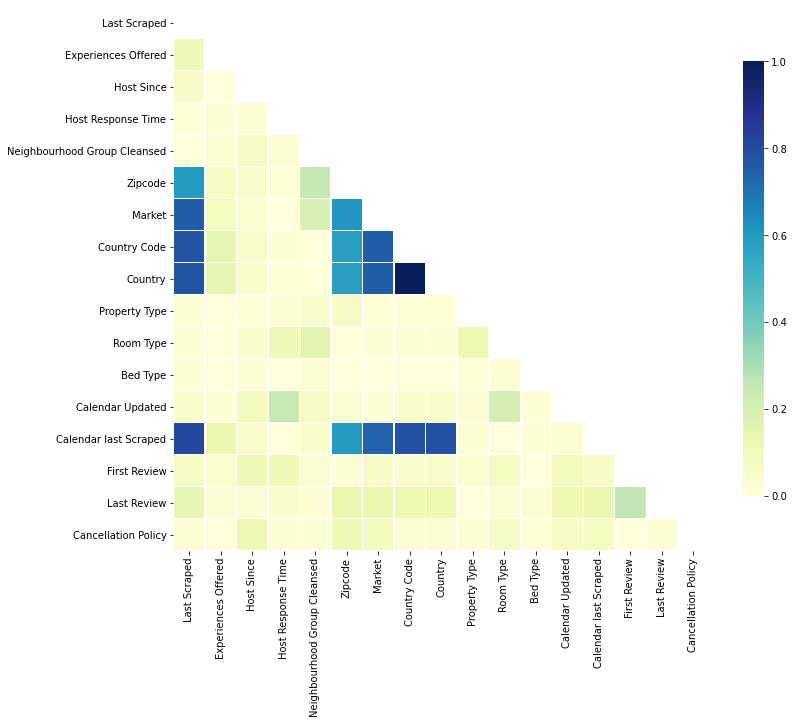

In [14]:
#Nos ayudamos de un grafico para identificar mejor las potenciales correlaciones

import seaborn as sns

# Compute the correlation matrix
corr = np.abs(df_train.select_dtypes("object").apply(lambda x: x.factorize()[0]).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

In [15]:
#Country code y Country estan altamente correlacionados, asique nos deshacemos de una de ellas
size_train = df_train.shape[1]
df_train = df_train.drop(columns=["Country"])
print(f"En valor absoluto hemos quitado {size_train-df_train.shape[1]} columnas de {size_train} quedando así {df_train.shape[1]} columnas")
print(f"En valor relativo hemos quitado un {round((size_train-df_train.shape[1])*100/size_train,2)} % de las columnas")


En valor absoluto hemos quitado 1 columnas de 40 quedando así 39 columnas
En valor relativo hemos quitado un 2.5 % de las columnas


In [16]:
#AHORA VAMOS A CODIFICAR TODAS LAS VARIABLES DE TIPO OBJ
#Primero vamos a echar un vistazo a nuestras variables de tipo obj
df_train.select_dtypes("object").describe()

,Last Scraped,Experiences Offered,Host Since,Host Response Time,Neighbourhood Group Cleansed,Zipcode,Market,Country Code,Property Type,Room Type,Bed Type,Calendar Updated,Calendar last Scraped,First Review,Last Review,Cancellation Policy
count,11824,11824,11821,10317,11006,11426,11780,11824,11824,11824,11824,11824,11824,9285,9284,11824
unique,37,5,2043,4,47,535,42,18,21,3,5,57,38,1583,730,8
top,2017-04-08,none,2016-01-12,within an hour,Centro,28012,Madrid,ES,Apartment,Entire home/apt,Real Bed,today,2017-04-08,2017-02-26,2017-04-02,strict
freq,10902,11810,148,6337,5433,1663,10621,11203,9598,7191,11565,3105,7955,50,615,4590


In [17]:
#Vamos aver mejor cuantos valores distintos toman estas caracteristicas
df_train.select_dtypes("object").nunique()

Last Scraped                      37
Experiences Offered                5
Host Since                      2043
Host Response Time                 4
Neighbourhood Group Cleansed      47
Zipcode                          535
Market                            42
Country Code                      18
Property Type                     21
Room Type                          3
Bed Type                           5
Calendar Updated                  57
Calendar last Scraped             38
First Review                    1583
Last Review                      730
Cancellation Policy                8
dtype: int64

In [18]:
#Vamos a realizar "target encoding" para dar valor a las variables
means_1 = df_train.groupby('Cancellation Policy')['Price'].mean()
means_2 = df_train.groupby('Bed Type')['Price'].mean()
means_3 = df_train.groupby('Room Type')['Price'].mean()
means_4 = df_train.groupby('Property Type')['Price'].mean()
means_5 = df_train.groupby('Country Code')['Price'].mean()
means_6 = df_train.groupby('Market')['Price'].mean()
means_7 = df_train.groupby('Zipcode')['Price'].mean()
means_8 = df_train.groupby('Neighbourhood Group Cleansed')['Price'].mean()
means_9 = df_train.groupby('Host Response Time')['Price'].mean()
means_10 = df_train.groupby('Experiences Offered')['Price'].mean()

In [19]:
#Sustituimos los caracteres por los valores de la media
df_train['Cancellation Policy'] = df_train['Cancellation Policy'].map(means_1)
df_train['Bed Type'] = df_train['Bed Type'].map(means_2)
df_train['Room Type'] = df_train['Room Type'].map(means_3)
df_train['Property Type'] = df_train['Property Type'].map(means_4)
df_train['Country Code'] = df_train['Country Code'].map(means_5)
df_train['Market'] = df_train['Market'].map(means_6)
df_train['Zipcode'] = df_train['Zipcode'].map(means_7)
df_train['Neighbourhood Group Cleansed'] = df_train['Neighbourhood Group Cleansed'].map(means_8)
df_train['Host Response Time'] = df_train['Host Response Time'].map(means_9)
df_train['Experiences Offered'] = df_train['Experiences Offered'].map(means_10)

In [20]:
# LAS FECHAS POR AHORA LAS VAMOS A DEJAR FUERA, ASI QUE LAS ELIMINO DEL DATAFRAME
df_train = df_train.drop(columns=["Last Scraped","Host Since", "Calendar Updated","Calendar last Scraped", "First Review", "Last Review" ])

In [21]:
#Ultimo paso antes de CV, eliminar na values por su mediana 
df_train.fillna(df_train.mean()[0], inplace=True)

In [22]:
df_train.head()

,Experiences Offered,Host Response Time,Host Response Rate,Host Listings Count,Neighbourhood Group Cleansed,Zipcode,Market,Country Code,Property Type,Room Type,...,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Reviews per Month
0,73.606698,73.135867,100.0,2.0,70.059155,83.679208,67.74503,71.789869,72.294431,95.101560,...,12,95.000000,9.000000,10.000000,10.000000,10.000000,10.000000,9.000000,65.076832,0.500000
1,73.606698,73.856443,100.0,1.0,72.889134,67.575466,67.74503,71.789869,72.294431,95.101560,...,20,91.000000,9.000000,9.000000,10.000000,10.000000,10.000000,10.000000,64.194133,2.430000
2,73.606698,73.856443,100.0,16.0,39.716263,38.073684,67.74503,71.789869,72.294431,31.320988,...,0,73.712458,73.712458,73.712458,73.712458,73.712458,73.712458,73.712458,65.076832,73.712458
3,73.606698,73.135867,100.0,114.0,72.889134,67.575466,67.74503,71.789869,72.294431,40.894831,...,0,73.712458,73.712458,73.712458,73.712458,73.712458,73.712458,73.712458,86.974488,73.712458
4,73.606698,73.856443,100.0,2.0,72.670588,61.730689,67.74503,71.789869,72.294431,40.894831,...,97,92.000000,9.000000,9.000000,9.000000,10.000000,9.000000,9.000000,86.974488,2.080000


In [23]:
df_train.describe()

,Experiences Offered,Host Response Time,Host Response Rate,Host Listings Count,Neighbourhood Group Cleansed,Zipcode,Market,Country Code,Property Type,Room Type,...,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Reviews per Month
count,11824.000000,11824.000000,11824.000000,11824.000000,11824.000000,11824.000000,11824.000000,11824.000000,11824.000000,11824.000000,...,11824.000000,11824.000000,11824.000000,11824.000000,11824.000000,11824.000000,11824.000000,11824.000000,11824.000000,11824.000000
mean,73.712458,73.910255,92.115585,12.769886,69.431240,73.768269,73.844001,73.861028,73.752164,73.730557,...,22.664834,87.596232,23.990113,23.893821,24.193427,24.152338,24.140750,23.896476,73.708597,17.299540
std,3.866294,0.645976,15.884453,34.588137,16.089385,36.686225,26.930032,19.240671,12.166457,26.648801,...,38.092338,10.985760,26.938765,26.960225,26.870600,26.820843,26.917815,27.061643,11.944839,29.547501
min,42.333333,73.135867,0.000000,0.000000,20.000000,18.000000,27.250000,29.000000,20.500000,31.320988,...,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,64.194133,0.020000
25%,73.606698,73.712458,90.000000,1.000000,70.059155,61.730689,67.745030,71.789869,72.294431,40.894831,...,1.000000,73.712458,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,64.194133,0.620000
50%,73.606698,73.856443,100.000000,2.000000,72.889134,67.780488,67.745030,71.789869,72.294431,95.101560,...,7.000000,91.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,65.076832,1.970000
75%,73.606698,73.856443,100.000000,6.000000,72.889134,77.422078,67.745030,71.789869,72.294431,95.101560,...,27.000000,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,86.974488,5.830000
max,219.500000,75.689076,100.000000,519.000000,218.000000,907.000000,783.000000,783.000000,296.769231,95.101560,...,356.000000,100.000000,73.712458,73.712458,73.712458,73.712458,73.712458,73.712458,175.458333,73.712458


In [24]:
#Ahora estamos listos para crear un modelo
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression 

#Separamos X de y

from sklearn import preprocessing
data = df_train.values
y_train = data[:,10]     # nos quedamos con la 1ª columna, price
X_train = data[:,0:]     # nos quedamos con el resto
X_train = np.delete(X_train, 10, 1)
feature_names = df_train.columns[0:]
# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

In [25]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

In [26]:
import statistics as st

In [27]:
#Hacemos seleccion de caracteristicas fijandonos en el mse y con el metodo hacia adelante
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

feature_ranking =[]
mse =[]
mse_list=[]
for j in range(X_train.shape[1]):
    
    best_score = 100000
    score=[]
    for i in range(X_train.shape[1]):
        
        reg = KFold(n_splits=5, shuffle = True)
        mse = []
        for train, validation in reg.split(X_train):

            if i in feature_ranking:
                a = True
                break
                
            if j == 0:

                X_val = X_train[validation,i].reshape(-1,1) 
                X_CV = X_train[train,i].reshape(-1,1)
                a =False
                
            if j>0:
                a=False

                idx = feature_ranking
                
                X_CV = np.concatenate((X_train[train,i].reshape(-1,1), X_train[np.ix_(train,idx)].reshape(len(train),len(idx))),axis=1)
                X_val = np.concatenate((X_train[validation,i].reshape(-1,1), X_train[np.ix_(validation,idx)].reshape(len(validation),len(idx))),axis=1) 
                print(X_CV.shape)
                
            y_val = y_train[validation].reshape(-1,1)
            y_CV= y_train[train].reshape(-1,1)     
  
            LR = LinearRegression().fit(X_CV,y_CV)
            y_hat = LR.predict(X_val)
            mse.append(np.mean((y_val.reshape(-1,1)-y_hat)**2))
           
        if a == True:
            continue
        else:    
            score.append(st.mean(mse))
        
        if score[-1] < best_score-1:
            best_feature = i
            best_score = score[-1]
     
    feature_ranking.append(best_feature)
    mse_list.append(best_score)
    


paso
paso
paso
paso
paso
Esta es la media 4.383469458609751
paso
paso
paso
paso
paso
Esta es la media 4.386107073983706
paso
paso
paso
paso
paso
Esta es la media 4.304355617835427
paso
paso
paso
paso
paso
Esta es la media 4.162466556225135
paso
paso
paso
paso
paso
Esta es la media 4.304068630771988
paso
paso
paso
paso
paso
Esta es la media 4.100627611849425
paso
paso
paso
paso
paso
Esta es la media 4.247062176344116
paso
paso
paso
paso
paso
Esta es la media 4.3839726613405245
paso
paso
paso
paso
paso
Esta es la media 4.286095656107939
paso
paso
paso
paso
paso
Esta es la media 3.1878108301704455
paso
paso
paso
paso
paso
Esta es la media 4.3788374377093024
paso
paso
paso
paso
paso
Esta es la media 4.229793992518651
paso
paso
paso
paso
paso
Esta es la media 4.020316522717324
paso
paso
paso
paso
paso
Esta es la media 4.375833595349552
paso
paso
paso
paso
paso
Esta es la media 3.1772227576463985
paso
paso
paso
paso
paso
Esta es la media 4.355102256420604
paso
paso
paso
paso
paso
Esta es la 

Esta es la media 3.131432445510528
1
(9459, 4)
1
(9459, 4)
2
(9459, 4)
3
(9459, 4)
1
(9460, 4)
Esta es la media 2.4502537330065324
1
(9459, 4)
1
(9459, 4)
3
(9459, 4)
1
(9459, 4)
1
(9460, 4)
Esta es la media 3.0478161471578957
2
(9459, 4)
1
(9459, 4)
2
(9459, 4)
1
(9459, 4)
1
(9460, 4)
Esta es la media 3.1888192615241047
2
(9459, 4)
1
(9459, 4)
1
(9459, 4)
1
(9459, 4)
2
(9460, 4)
Esta es la media 3.486874425164017
2
(9459, 4)
1
(9459, 4)
2
(9459, 4)
1
(9459, 4)
1
(9460, 4)
Esta es la media 3.1474019066597827
4
(9459, 4)
1
(9459, 4)
1
(9459, 4)
1
(9459, 4)
1
(9460, 4)
Esta es la media 3.154880335304305
1
(9459, 4)
1
(9459, 4)
3
(9459, 4)
1
(9459, 4)
1
(9460, 4)
Esta es la media 3.18746703670815
1
(9459, 4)
2
(9459, 4)
1
(9459, 4)
1
(9459, 4)
3
(9460, 4)
Esta es la media 3.187256022926034
2
(9459, 4)
2
(9459, 4)
1
(9459, 4)
1
(9459, 4)
1
(9460, 4)
Esta es la media 3.1873004156696916
2
(9459, 4)
1
(9459, 4)
2
(9459, 4)
1
(9459, 4)
1
(9460, 4)
Esta es la media 3.1865381119235856
3
(9459, 4

1
(9459, 7)
1
(9459, 7)
1
(9460, 7)
Esta es la media 3.0763099672177385
1
(9459, 7)
1
(9459, 7)
1
(9459, 7)
3
(9459, 7)
1
(9460, 7)
Esta es la media 3.077011873400342
2
(9459, 7)
2
(9459, 7)
1
(9459, 7)
1
(9459, 7)
1
(9460, 7)
Esta es la media 3.074156121685429
4
(9459, 7)
1
(9459, 7)
1
(9459, 7)
2
(9459, 7)
1
(9460, 7)
Esta es la media 3.072180743978669
1
(9459, 7)
3
(9459, 7)
1
(9459, 7)
1
(9459, 7)
2
(9460, 7)
Esta es la media 3.0731958517734164
1
(9459, 7)
3
(9459, 7)
1
(9459, 7)
1
(9459, 7)
1
(9460, 7)
Esta es la media 3.075446677565257
3
(9459, 7)
2
(9459, 7)
1
(9459, 7)
1
(9459, 7)
1
(9460, 7)
Esta es la media 3.080439696925944
1
(9459, 7)
3
(9459, 7)
1
(9459, 7)
1
(9459, 7)
1
(9460, 7)
Esta es la media 3.0758063406624734
3
(9459, 7)
1
(9459, 7)
1
(9459, 7)
1
(9459, 7)
1
(9460, 7)
Esta es la media 3.044797438909717
2
(9459, 7)
1
(9459, 7)
3
(9459, 7)
1
(9459, 7)
1
(9460, 7)
Esta es la media 3.073271174016741
############HEMOS ELEGIDO LA VARIABLE 5 #################
1
(9459, 8)
2

(9459, 11)
1
(9459, 11)
3
(9459, 11)
1
(9460, 11)
Esta es la media 2.9320493696414847
3
(9459, 11)
1
(9459, 11)
1
(9459, 11)
1
(9459, 11)
1
(9460, 11)
Esta es la media 2.9947838825917903
1
(9459, 11)
3
(9459, 11)
1
(9459, 11)
2
(9459, 11)
1
(9460, 11)
Esta es la media 2.911605424766078
1
(9459, 11)
1
(9459, 11)
1
(9459, 11)
3
(9459, 11)
1
(9460, 11)
Esta es la media 2.903561276430141
1
(9459, 11)
1
(9459, 11)
2
(9459, 11)
1
(9459, 11)
2
(9460, 11)
Esta es la media 2.9283926495223986
2
(9459, 11)
1
(9459, 11)
1
(9459, 11)
1
(9459, 11)
4
(9460, 11)
Esta es la media 2.9292468973937096
1
(9459, 11)
1
(9459, 11)
4
(9459, 11)
2
(9459, 11)
1
(9460, 11)
Esta es la media 2.924152701304516
2
(9459, 11)
1
(9459, 11)
1
(9459, 11)
1
(9459, 11)
2
(9460, 11)
Esta es la media 2.9227843836130716
1
(9459, 11)
2
(9459, 11)
1
(9459, 11)
3
(9459, 11)
1
(9460, 11)
Esta es la media 2.926264761532965
1
(9459, 11)
3
(9459, 11)
1
(9459, 11)
2
(9459, 11)
1
(9460, 11)
Esta es la media 2.929023483050498
1
(9459, 1

1
(9459, 15)
2
(9459, 15)
1
(9460, 15)
Esta es la media 2.676017670260462
1
(9459, 15)
2
(9459, 15)
1
(9459, 15)
3
(9459, 15)
1
(9460, 15)
Esta es la media 2.739718240958221
3
(9459, 15)
1
(9459, 15)
2
(9459, 15)
1
(9459, 15)
1
(9460, 15)
Esta es la media 2.6976777025980176
1
(9459, 15)
3
(9459, 15)
1
(9459, 15)
1
(9459, 15)
2
(9460, 15)
Esta es la media 2.691929517225539
2
(9459, 15)
2
(9459, 15)
1
(9459, 15)
1
(9459, 15)
1
(9460, 15)
Esta es la media 2.659911422064461
1
(9459, 15)
2
(9459, 15)
2
(9459, 15)
1
(9459, 15)
1
(9460, 15)
Esta es la media 2.6967815704755544
2
(9459, 15)
1
(9459, 15)
2
(9459, 15)
1
(9459, 15)
1
(9460, 15)
Esta es la media 2.6728603164634834
2
(9459, 15)
1
(9459, 15)
1
(9459, 15)
1
(9459, 15)
2
(9460, 15)
Esta es la media 2.6791497750512407
3
(9459, 15)
1
(9459, 15)
1
(9459, 15)
1
(9459, 15)
2
(9460, 15)
Esta es la media 2.656249721775282
2
(9459, 15)
1
(9459, 15)
3
(9459, 15)
1
(9459, 15)
1
(9460, 15)
Esta es la media 2.6710489827257238
############HEMOS ELE

1
(9459, 21)
3
(9459, 21)
1
(9459, 21)
1
(9459, 21)
1
(9460, 21)
Esta es la media 1.8646641793946372
1
(9459, 21)
1
(9459, 21)
3
(9459, 21)
2
(9459, 21)
1
(9460, 21)
Esta es la media 1.925931525101811
1
(9459, 21)
1
(9459, 21)
1
(9459, 21)
4
(9459, 21)
1
(9460, 21)
Esta es la media 1.904613224251065
1
(9459, 21)
2
(9459, 21)
1
(9459, 21)
1
(9459, 21)
2
(9460, 21)
Esta es la media 1.923860785606316
2
(9459, 21)
2
(9459, 21)
1
(9459, 21)
1
(9459, 21)
1
(9460, 21)
Esta es la media 1.9104114919255115
2
(9459, 21)
1
(9459, 21)
2
(9459, 21)
1
(9459, 21)
1
(9460, 21)
Esta es la media 1.9129937038298703
1
(9459, 21)
2
(9459, 21)
1
(9459, 21)
2
(9459, 21)
1
(9460, 21)
Esta es la media 1.910557584068688
2
(9459, 21)
1
(9459, 21)
1
(9459, 21)
1
(9459, 21)
2
(9460, 21)
Esta es la media 1.8565253430795892
1
(9459, 21)
1
(9459, 21)
1
(9459, 21)
2
(9459, 21)
3
(9460, 21)
Esta es la media 1.9085917232164962
2
(9459, 21)
1
(9459, 21)
2
(9459, 21)
1
(9459, 21)
1
(9460, 21)
Esta es la media 1.92621722368

(9459, 31)
1
(9459, 31)
1
(9459, 31)
3
(9459, 31)
1
(9460, 31)
Esta es la media 1.8979419227915835
############HEMOS ELEGIDO LA VARIABLE 30 #################
3
(9459, 32)
1
(9459, 32)
1
(9459, 32)
2
(9459, 32)
1
(9460, 32)
Esta es la media 1.895120447760891
############HEMOS ELEGIDO LA VARIABLE 31 #################


(0.0, 32.0, 0.0, 10.0)

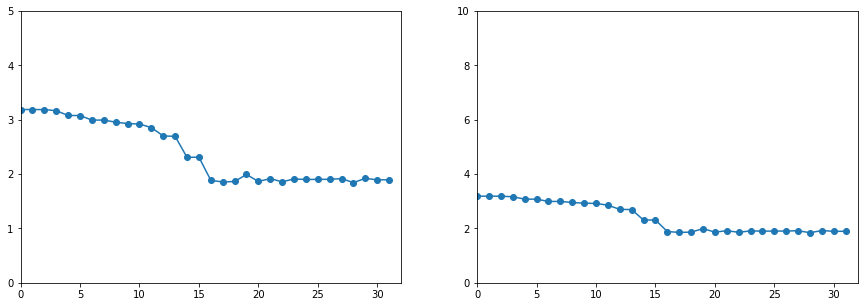

In [33]:
plt.figure(figsize=(15, 5))  
plt.subplot(1,2,1)
plt.scatter(list(range(X_train.shape[1])),mse_list)
plt.plot(list(range(X_train.shape[1])),mse_list)
plt.axis([0, X_train.shape[1], 0, 5])

plt.subplot(1,2,2)
plt.scatter(list(range(X_train.shape[1])),mse_list)
plt.plot(list(range(X_train.shape[1])),mse_list)
plt.axis([0, X_train.shape[1], 0, 10])


In [42]:
feature_ranking[0:16]

[9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15]

In [43]:
#Observando la grafica parece que escogiendo las 17 primeras caracteristicas nuestro modelo darai un resultado adecuado
feature_ranking[0:16]
#Dado a que el precio esta en la columna 10, todos los valores que esten por encima de 10 le tendremos que sumar 1 
#para identificar la columna correcta
features = []
for i in list(range(len(feature_ranking[0:16]))):
    if i>=10:
        features.append(i+1)
    else:
        features.append(i)
    

In [44]:
features

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16]

In [45]:
#Me quedo solo con las 17 caracteristicas
df_train=df_train.iloc[:,features]

,Experiences Offered,Host Response Time,Host Response Rate,Host Listings Count,Neighbourhood Group Cleansed,Zipcode,Market,Country Code,Property Type,Room Type,Bathrooms,Bedrooms,Beds,Bed Type,Price,Cleaning Fee
0,73.606698,73.135867,100.0,2.0,70.059155,83.679208,67.74503,71.789869,72.294431,95.101560,1.0,1.0,2.0,74.080606,60.0,25.000000
1,73.606698,73.856443,100.0,1.0,72.889134,67.575466,67.74503,71.789869,72.294431,95.101560,1.0,1.0,2.0,74.080606,50.0,15.000000
2,73.606698,73.856443,100.0,16.0,39.716263,38.073684,67.74503,71.789869,72.294431,31.320988,1.5,1.0,8.0,74.080606,10.0,5.000000
3,73.606698,73.135867,100.0,114.0,72.889134,67.575466,67.74503,71.789869,72.294431,40.894831,3.0,1.0,1.0,74.080606,30.0,73.712458
4,73.606698,73.856443,100.0,2.0,72.670588,61.730689,67.74503,71.789869,72.294431,40.894831,1.0,1.0,1.0,74.080606,32.0,73.712458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11819,73.606698,73.856443,100.0,1.0,82.463687,63.807273,67.74503,71.789869,72.294431,95.101560,1.0,2.0,2.0,74.080606,52.0,16.000000
11820,73.606698,73.856443,100.0,2.0,34.334459,32.840000,67.74503,71.789869,72.294431,95.101560,1.0,3.0,3.0,74.080606,55.0,30.000000
11821,73.606698,73.856443,100.0,1.0,72.889134,82.043210,67.74503,71.789869,72.294431,95.101560,1.0,1.0,1.0,74.080606,69.0,30.000000
11822,73.606698,73.856443,100.0,1.0,72.889134,67.780488,67.74503,71.789869,72.294431,95.101560,1.0,1.0,1.0,74.080606,69.0,25.000000


In [46]:
alpha_vector = np.logspace(-5,4,20)
degree_vector = [1,2,3,4]#np.linspace(1,3,3)

param_grid = {'poly__degree':degree_vector,'model__alpha': alpha_vector}
steps = [
    ('poly', PolynomialFeatures()),
    ('model', Ridge())
]

pipeline = Pipeline(steps)


grid = GridSearchCV(pipeline, scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 5, verbose = 2,n_jobs =6)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#-1 porque es negado
#scores = -1*np.array(grid.cv_results_['mean_test_score'])
#plt.semilogx(alpha_vector,scores,'-o')
#plt.xlabel('alpha',fontsize=16)
#plt.ylabel('5-Fold MSE')
#plt.show()

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:  2.8min
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed: 65.1min
[Parallel(n_jobs=6)]: Done 353 tasks      | elapsed: 250.8min
[Parallel(n_jobs=6)]: Done 400 out of 400 | elapsed: 297.1min finished


best mean cross-validation score: -1.544
best parameters: {'model__alpha': 3359.8182862837743, 'poly__degree': 2}


In [63]:
alpha_vector = np.logspace(-3,2,5)
degree_vector = [1,4]#np.linspace(1,3,3)

param_grid = {'poly__degree':degree_vector,'model__alpha': alpha_vector}
steps = [
    ('poly', PolynomialFeatures()),
    ('model', Ridge())
]

pipeline = Pipeline(steps)


grid_2 = GridSearchCV(pipeline, scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 5, verbose = 2,n_jobs =6)
grid_2.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid_2.best_score_))
print("best parameters: {}".format(grid_2.best_params_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed: 22.5min
[Parallel(n_jobs=6)]: Done  50 out of  50 | elapsed: 63.3min finished


best mean cross-validation score: -1.852
best parameters: {'model__alpha': 100.0, 'poly__degree': 1}


In [ ]:
grid.cv_results_["".values()

In [56]:
scores.reshape(-1,1).shape

(80, 1)

In [62]:
scores

array([1.85834356e+00, 2.43725204e+02, 2.82338157e+10,            nan,
       1.85834355e+00, 2.43414660e+02, 1.90027765e+10,            nan,
       1.85834353e+00, 2.42497884e+02, 1.01978374e+10,            nan,
       1.85834348e+00, 2.39836483e+02, 4.38409223e+09,            nan,
       1.85834333e+00, 2.32497076e+02, 1.62014958e+09,            nan,
       1.85834289e+00, 2.14884244e+02, 5.28557997e+08,            nan,
       1.85834157e+00, 1.83249424e+02, 1.52886074e+08,            nan,
       1.85833763e+00, 1.46241560e+02, 3.99540790e+07, 2.53295305e+09,
       1.85832599e+00, 1.16365545e+02, 9.54496158e+06,            nan,
       1.85829188e+00, 9.29685310e+01, 2.22152400e+06,            nan,
       1.85819480e+00, 7.21127941e+01, 4.75312066e+05,            nan,
       1.85793803e+00, 5.63246066e+01, 7.02114350e+04, 4.92797557e+07,
       1.85734966e+00, 4.53460556e+01, 5.55647181e+03, 4.35804551e+06,
       1.85620229e+00, 3.23703699e+01, 2.39306511e+03, 2.28784170e+06,
      

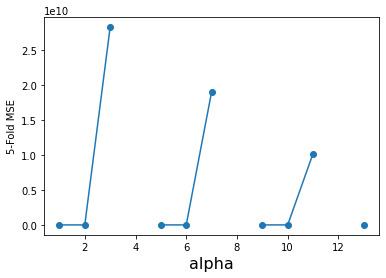

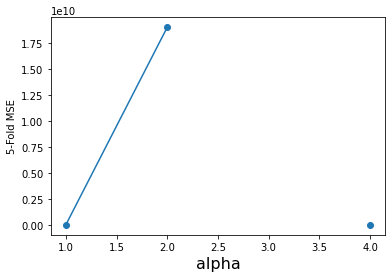

In [61]:
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13],scores[0:13].reshape(-1,1),'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
#plt.axis([1, 4, 0, 3000])
plt.show()

scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.plot(degree_vector,scores[5:9],'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.show()

In [ ]:
degree = [1,4]#np.linspace(1,2,2)

mse_list = []


for i in degree:

    # features

    poly    = PolynomialFeatures(degree[i]-1) # generamos x^j
    X_train = poly.fit_transform(X_train)#.reshape(-1, 1))
    y_train = y_train.reshape(-1,1)
    
    reg = KFold(n_splits=5, shuffle = True)
    mse = []

    for train, validation in reg.split(X_train):
            
            
            LR = PolynomialFeatures().fit(X_train[train],y_train[train])
            
            y_hat = LR.predict(X_train[validation])
            
           
            mse.append(np.mean((y_train[validation]-y_hat)**2))
            
    mse_list.append(st.mean(mse))




In [ ]:
print(a)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
RSE=[]
feature_ranking =[]



plt.figure(figsize=(15, 5))  

plt.subplot(1,2,1)
plt.scatter(range(0,22),RSE)
plt.plot(range(0,22),RSE)
plt.axis([0, 22, 0, 1])

plt.subplot(1,2,2)
plt.scatter(range(0,22),RSE)
plt.plot(range(0,22),RSE)
plt.axis([0, 22, 0.2, 0.5])

        

In [ ]:
## HACER MAS ADELANTE
##PRIMERO SE TRATAN MAS LOS DATOS NUMERICOS
##LUEGO ESTA EL FILTRADO POR CANTIDAD DE VALORES UNICOS 
###Y LUEGO ESTA LA SELECCION DE CARACTERISTICAS CON CROSS-VALIDATION

In [ ]:
#Ahora vamos a ver las caracteristicas numericas a ver si podemos filtrar alguna o retocar alguna
df_train.select_dtypes(include = "number").describe()

In [ ]:
#Dejar para mas adelante descartar los outliers, primero quiero hacer el metodo wraper
plt.figure(figsize=(15, 5))

plt.subplot(1,4,1)
df_train ['Host Response Rate'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.axis([0, 100, 0, 300])
plt.xlabel('Host Response Rate')

plt.subplot(1,4,2)
df_train ['Host Listings Count'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.axis([0, 520, 0, 50])
plt.xlabel('Host Listings Count')

plt.subplot(1,4,3)
df_train ['Accommodates'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.axis([0, 20, 0, 50])
plt.xlabel('Accommodates')

plt.subplot(1,4,4)
df_train ['Bathrooms'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.axis([0, 20, 0, 50])
plt.xlabel('Bathrooms')
#######################################################
plt.subplot(2,4,5)
df_train ['Bedrooms'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.axis([0, 10, 0, 100])
plt.xlabel('Bedrooms')

plt.subplot(2,4,6)
df_train ['Beds'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.axis([0, 16, 0, 200])
plt.xlabel('Beds')

plt.subplot(2,4,7)
df_train ['Price'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.axis([0, 1000, 0, 200])
plt.xlabel('Price')

plt.subplot(2,4,8)
df_train ['Cleaning Fee'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.axis([0, 800, 0, 50])
plt.xlabel('Cleaning Fee')

In [ ]:
#Ahora vamos a visualizar todas las variables no-numericas, y asi discernir aquellas que no aportan nada para nuestro modelo
#Para ello veremos el numero de concurrencias de cada una y asi distinguir aquellas 
#que no son variables categoricas (es decir, son solo texto)
delete_columns = df_train.select_dtypes(include = "object")
delete_columns.nunique()



In [ ]:
#Filtrar por aquellas variables que tienen mas de 500 concurrencias distintas parece un buen primer paso
#para separar variables categoricas de variables no categoricas
l = delete_columns.nunique()>500
l = l[l[:]==True]
l = l.axes[0].tolist()
#Ahora vamos a calcular en terminos absolutos y relativos cuantas columnas hemos filtrado
print(f"En valor absoluto hemos quitado {len(l)} columnas de {df_train.shape[1]}")
print(f"En valor relativo hemos quitado un {round((len(l))*100/df_train.shape[1],2)} % de las columnas")

In [ ]:
df_train_v1 = df_train.drop(columns=l)

In [ ]:
#Arreglo temporal para no tener columnas de tipo object en el dataframe
object_cols=df_train_v3.select_dtypes(include="object")
cols = object_cols.axes[1].tolist()
df_train_v3 = df_train_v3.drop(columns = cols)
df_train_v3.head()

In [ ]:
XtrainScaled[:,feature_ranking]

In [ ]:
feature_ranking